In [22]:
# Install required libraries
!pip install matplotlib
!pip install pillow
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python3 -m pip install --upgrade pip


# Food Image Classification with Hugging Face

<p align="center">
  <img src="Food class_2.png" alt="Food class_2" width="500">
</p>

A popular social media platform dedicated to food enthusiasts wants to improve user engagement by adding advanced image recognition features. As a machine learning engineer, you are tasked with developing a food image classification system using Hugging Face's state-of-the-art models. This system will automatically identify and categorize food items in user-uploaded photos, allowing for better content organization and personalized food content recommendations.

Your responsibility is to develop a robust food category image classification system using pre-trained models from Hugging Face.

The goal is to enhance user interaction by providing accurate food classification, enabling users to easily find and engage with content related to their favorite foods, and improving the overall experience on the platform.

In this dynamic project, we leverage the power of PyTorch and transformers, utilizing an open-source model from Hugging Face as the backbone of our solution.

In [13]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

from transformers import pipeline
from transformers.utils import logging
# Only show error messages from the transformers library to reduce the amount of log output
logging.set_verbosity_error()

import warnings
# Ignore all Python warnings to keep the output clean
warnings.filterwarnings("ignore")

In [14]:
# Helper function to convert image to RGB format
def convert_to_rgb(image):
    """
    Converts an image to RGB format.

    Parameters:
    image (PIL.Image): An image object.

    Returns:
    PIL.Image: Image object in RGB format.
    """
    return image.convert('RGB')

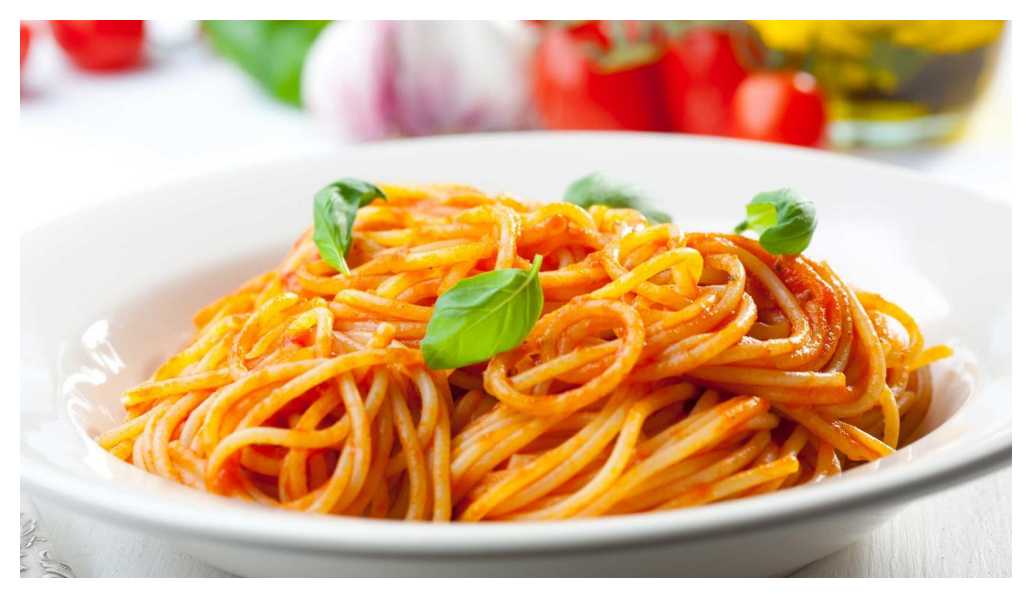

In [15]:
# Path to the image
image_path = 'Food Pictures/food_1.png'

# Load the image
img = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

In [16]:
from huggingface_hub import HfApi, ModelFilter
api = HfApi()
# Return the filtered list from the Hub
# Example: Searching for models related to food category classification
models = api.list_models(
    filter=ModelFilter(task="image-classification",tags=["food",]),
    sort="downloads",
    direction=-1,
    #limit=5
)

model_list = list(models)

# Example: Print out model names and IDs from the filtered results
for model in model_list:
    if 'food' in model.modelId:
        if 'category' in model.modelId:
            print(f"Model Name: {model.modelId}")
            print(f"Model Tags: {model.tags}")
            #print(f"Model Description: {model.description}")
            print("\n")

Model Name: Kaludi/food-category-classification-v2.0
Model Tags: ['transformers', 'pytorch', 'swin', 'image-classification', 'vision', 'dataset:Kaludi/food-category-classification-v2.0', 'co2_eq_emissions', 'autotrain_compatible', 'endpoints_compatible', 'region:us']


Model Name: Kaludi/food-category-classification
Model Tags: ['transformers', 'pytorch', 'swin', 'image-classification', 'vision', 'dataset:Kaludi/data-food-classification', 'co2_eq_emissions', 'autotrain_compatible', 'endpoints_compatible', 'region:us']




In [17]:
## just two models from search, this filter is very dynamic and can be changed based on tags etc 
# Create the pipeline
image_classifier = pipeline(task="image-classification", 
                      model="Kaludi/food-category-classification-v2.0")

# Specify the directory where you want to save the model
save_directory = "Food Pictures/"

# Ensure the directory exists or create it if it doesn't
#os.makedirs(save_directory, exist_ok=True)
image_classifier.save_pretrained(save_directory)

In [18]:
class_scores = image_classifier(convert_to_rgb(img))


In [19]:
max_score = -1.0  # Start with a very low score
best_label = None

# Iterate through predictions to find the label with the max score
for prediction in class_scores:
    if prediction['score'] > max_score:
        max_score = prediction['score']
        best_label = prediction['label']

# Print the label with the max score
print(f"The label with the maximum score is: {best_label}")

The label with the maximum score is: Noodles


In [20]:
highest_probability = max(class_scores, key=lambda x: x['score'])
highest_probability_class = highest_probability['label']
print(f"Predicted food category: {highest_probability_class}")


Predicted food category: Noodles
